### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('data/winequality-red.csv')#, sep = ';')

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
X = df.drop('quality', axis = 1)
y = df['quality']

<AxesSubplot:>

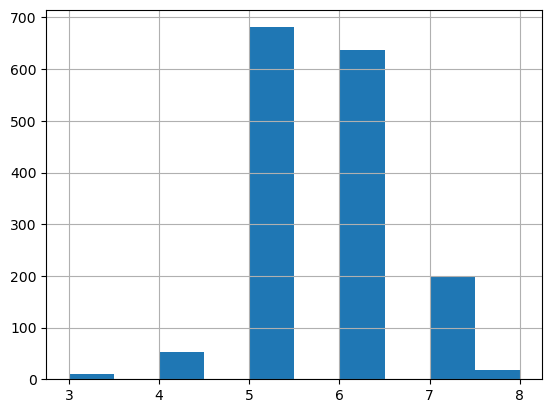

In [9]:
y.hist()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

Just Ridge

In [42]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [67]:
print(mean_squared_error(ridge.predict(X_test), y_test))
print(X_test.columns)
print(ridge.coef_)

0.390992172857555
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
[ 1.26502223e-02 -1.03070523e+00 -1.55604104e-01  6.48000971e-04
 -1.17799962e+00  5.13449061e-03 -3.58968147e-03 -1.46127726e-02
 -3.55665195e-01  7.17888390e-01  3.07230429e-01]


For SFS Lasso

In [47]:
sfs = SequentialFeatureSelector(estimator = Lasso(), n_features_to_select=4)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=Lasso(), n_features_to_select=4)

In [52]:
fit = Lasso().fit(X_train[sfs.get_feature_names_out()], y_train)

In [62]:
print(mean_squared_error(fit.predict(X_test[sfs.get_feature_names_out()]), y_test))
print(sfs.get_feature_names_out())
print(fit.coef_)

0.6150055162124933
['fixed acidity' 'volatile acidity' 'citric acid' 'total sulfur dioxide']
[ 0.         -0.          0.         -0.00423895]


For RFE Lasso

In [55]:
rfe = RFE(estimator = Lasso(), n_features_to_select=4)
rfe.fit(X_train, y_train)

RFE(estimator=Lasso(), n_features_to_select=4)

In [60]:
print(mean_squared_error(rfe.predict(X_test), y_test))
print(rfe.get_feature_names_out())
print(rfe.estimator_.coef_)

0.6150055162124933
['total sulfur dioxide' 'pH' 'sulphates' 'alcohol']
[-0.00423895 -0.          0.          0.        ]
